The thermal conductivity of the fuel changes with change in temperature with the following relation:

\begin{equation}
\int_{T_{fo}}^{T(r)}k(T)dT = \frac{q'}{4π}*(1-(\frac{r}{r_{fo}})^2)
\end{equation}

Using the relations provided in the pdf, k(T) is given by:
\begin{equation}
k(T) = 1.755+(k_0-1.755)*exp(\frac{β}{128.15})
\end{equation}

\begin{equation}
k_0(T) = (\frac{1}{A+B*T(K)} + \frac{D}{T^2(K)}*exp(\frac{E}{T(K))}))*(1-p)^2
\end{equation}

\begin{equation}
A=0.01926+1.06*10^{-6}*x +2.63*10^{-8}
\end{equation}

\begin{equation}
B=2.39*10^{-4} + 1.37*10^{-13}
\end{equation}

\begin{equation}
D=5.27*10^{9}
\end{equation}

\begin{equation}
E=17109.5
\end{equation}

The term x used in A is the deviation	from	stoichiometry and is calculated as:
\begin{equation}
x=2-O/M
\end{equation}

Takin all of the previous equations into account, and solving the integral we get an equation that cannot be solved analytically, but only numerically.

\begin{equation}
1.755(T(r)-T_1)(1-e^x)+(1-p)^{2.5}(\frac{ln(B*T(r)+A)}{B}-\frac{ln(B*T_{fo})+A)}{B}+D*\frac{e^{-E/T(r)}-e^{-E/T_{fo}}}{E}) = \frac{q'}{4π}(1-(\frac{r}{r_{fo}})^2)
\end{equation}

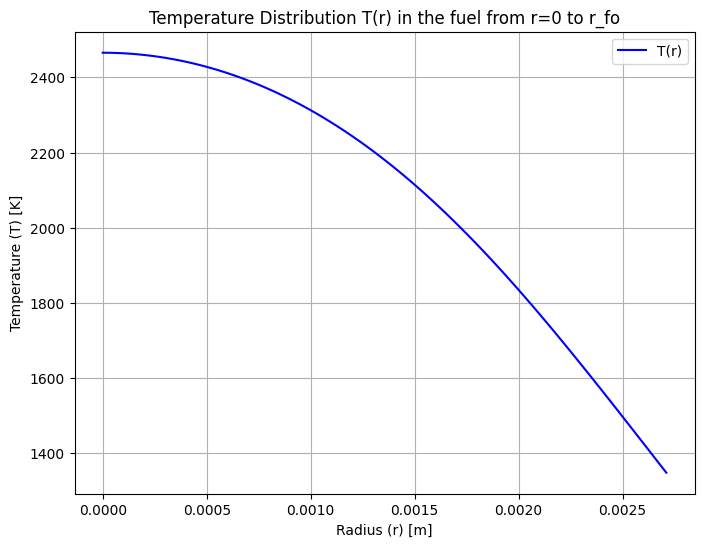

In [3]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np

# Parameters
r_fo = 2.71e-3  # meters
q_prime = 38.7e3  # W/m
T_fo = 1348.15  # Kelvin
p = 0.05
x = 0.043
D = 5.27e9
E = 17109.5
beta = 56

# Calculate A and B based on provided formulas
A = 0.01926 + 1.06e-6 * x + 2.63e-8
B = 2.39e-4 + 1.37e-13
exponent = beta/128.75

# Constants
q_prime_over_4pi = q_prime / (4 * np.pi)
p_factor = (1 - p)**2.5
exp_factor_1 = np.exp(-E / T_fo)

# Define the function to solve for T(r) at each r
def equation_to_solve(T_r, r):
    # Left-hand side of the equation minus the right-hand side (LHS - RHS = 0)
    term1 = 1.755 * (T_r - T_fo) * (1 - np.exp(-exponent))  # Assuming x = -r as a function of r
    term2 = p_factor * ((np.log(B * T_r + A) - np.log(B * T_fo + A)) / B +
                        D * (np.exp(-E / T_r) - exp_factor_1) / E)
    lhs = term1 + term2
    rhs = q_prime_over_4pi * (1 - (r / r_fo)**2)
    return lhs - rhs

# Range of r values from r1 to 0
r_values = np.linspace(r_fo, 0, 100)
T_values = []

# Solve for T(r) for each value of r using an initial guess of T1
initial_guess = T_fo
for r in r_values:
    T_r_solution = fsolve(equation_to_solve, initial_guess, args=(r))[0]
    T_values.append(T_r_solution)
    initial_guess = T_r_solution  # Update initial guess for smoother convergence

# Plotting T(r) vs r
plt.figure(figsize=(8, 6))
plt.plot(r_values, T_values, label="T(r)", color='blue')
plt.xlabel("Radius (r) [m]")
plt.ylabel("Temperature (T) [K]")
plt.title("Temperature Distribution T(r) in the fuel from r=0 to r_fo")
plt.legend()
plt.grid(True)  # Invert x-axis to show r from r1 to 0
plt.show()


